# ***Progetto Python con Pandas***

### Introduzione all'analisi esplorativa del dataset di vini

Questo progetto di analisi dati si concentra su un ampio dataset di recensioni di vini provenienti da diverse regioni vinicole di tutto il mondo. I dati comprendono una vasta gamma di informazioni sulle recensioni di vini, quali paese di produzione, la regione, la varietà, il punteggio e molto altro.

Questi dati sono la chiave per comprendere la complessità e varietà del mondo del vino. L'obiettivo primario è quello di utilizzare approcci analitici, tecniche di elaborazione e visualizzazione dati, per poter esplorare e interpretare i dati a nostra disposizione. Il risultato sarà una guida all'assortimento, che consentirà di iniziare a plasmare un ipotetico marketplace di vini italiani in modo informato e strategico.

### Obiettivi dell'analisi
Il cuore di questo progetto sarà incentrato su vari aspetti chiave che informeranno la strategia dell'assortimento per il nostro ipotetico marketplace di vino.

*Gli obiettivi principali includono*: 
- ***Identificazione delle Varietà di Vino e Vigne più Apprezzate***:le varietà di vino più apprezzate dagli acquirenti, basandoci sui punteggi delle recensioni.

- ***Analisi degli Outlier di Prezzo***: eventuali valori anomali nel prezzo dei vini, che potrebbero influire sull'aspetto economico dell'assortimento.

- ***Correlazione tra Variabili***: esplorare le correlazioni tra varie caratteristiche del vino come punteggio, prezzo.

### Struttura del notebook
Questo progetto di analisi sarà articolato in due distinti capitoli, ciascuno con un preciso obiettivo. Nella prima parte esaminerò il panorama vinicolo nel suo insieme con uno sguardo attento alle varietà di vino più apprezzate, alle rinomate vigne,agli interessanti outlier di prezzo e alle correlazioni tra le variabili.

Nel secondo capitolo, passando dall'esplorazione all'azione, mi concentrerò sulla strategia di assortimento per un ipotetico marketplace di vini italiani. Guidato da condizioni ben definite, selezionerò con cura i vini destinati ad arricchire l'offerta del nostro marketplace. Questa parte sarà una sorta di viaggio strategico tra le diverse variabili del mondo del vino, affinchè possiamo offrire ai nostri ipotetici clienti un'esperienza degna degli intenditori più esigenti.

## Parte1. Analisi del dataset

In [226]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [227]:
# data import
data = pd.read_csv("winemag-data-130k-v2.csv")

In [228]:
# check the first lines
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [229]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In questa fase iniziale decido di concentrarmi sulla pulizia del dataframe, eliminando colonne inutili per le nostre analisi. Dal precedente output si nota che alcune colonne contengono valori nulli. Preferisco non cancellare le righe contenenti valori nulli in questo caso, per non correre il rischio di eliminare dati correlati potenzialmente importanti. Semplicemente utilizzerò le colonne con cautela, tenendo in considerazione l'incompletezza dei dati.

#### Data Cleaning

In [230]:
# rimuovo le colonne inutili alle analisi
data = data.drop(['Unnamed: 0', 'taster_name', 'taster_twitter_handle'], axis=1)

In [231]:
# Calcolo la percentuale di dati mancanti per ciascuna categoria
total_rows = len(data)
missing_data_counts = data.isnull().sum()
missing_data_percentage = (missing_data_counts / total_rows) * 100
missing_data_percentage = missing_data_percentage.round(2)
print(f"Percentuale di dati mancanti per ogni colonna:\n{missing_data_percentage}")

Percentuale di dati mancanti per ogni colonna:
country         0.05
description     0.00
designation    28.83
points          0.00
price           6.92
province        0.05
region_1       16.35
region_2       61.14
title           0.00
variety         0.00
winery          0.00
dtype: float64


Come si vede da questo output, le colonne che contengono più valori nulli sono region_2(61.1%), designation(28.8%), region_1(16.3%). Utilizzerò con cautela i dati senza però eliminare nessuna riga per ora.

#### Statistiche descrittive generali

In [232]:
# stats
data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


Queste informazioni forniscono una panoramica utile della distribuzione dei punteggi e dei prezzi all'interno del dataset. Notiamo che quasi 9000 vini non hanno il prezzo. Scopriamo così punteggio minimo e massimo (80,100), punteggio medio (88.4) e anche che la maggior parte dei vini ha un punteggio compreso tra 86 e 91. Allo stesso modo scopriamo che il prezzo medio di un vino di questo dataset è di 35.3 euro; il vino più costoso (3300) e il vino più economico (4). La maggior parte dei vini in questo dataset ha un prezzo compreso tra i 17 e i 42. Possiamo quindi definire outlier di prezzo tutti quanti quei vini che si discostano dal range appena definito.

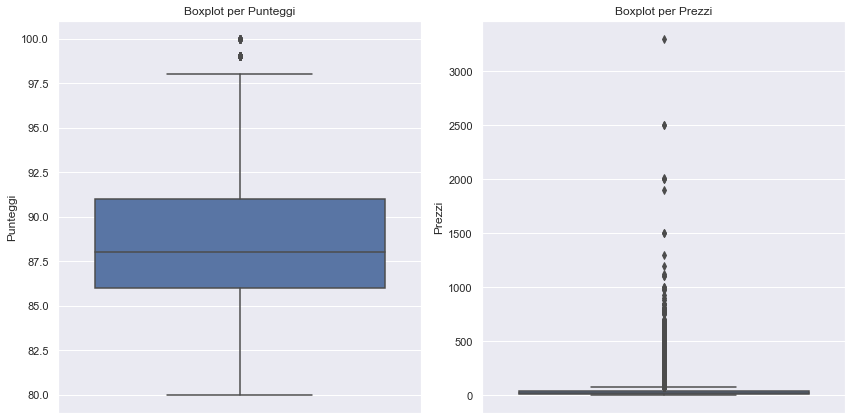

In [233]:
# imposto lo stile grafico di seaborn
sns.set()

# Creazione dei boxplot separati per punteggi e prezzi
plt.figure(figsize=(12, 6))

# punteggi
plt.subplot(1, 2, 1)  
sns.boxplot(y=data['points'])
plt.title('Boxplot per Punteggi')
plt.ylabel('Punteggi')

# prezzi
plt.subplot(1, 2, 2)  
sns.boxplot(y=data['price'])
plt.title('Boxplot per Prezzi')
plt.ylabel('Prezzi')

# Visualizzazione dei boxplot
plt.tight_layout()
plt.show()

Questi boxplot separati confermano l'output della descrizione precedente. Rileviamo quindi facilmente così gli outlier di prezzo, rappresentati dai cerchietti sull'asse verticale al di sopra della distribuzione principale; nel grafico risulta molto schiacchiata verso il basso, per la presenza di molti outlier di prezzo molto alti, che fanno estendere l'asse verticale oltre i 3000 euro. Per avere una visione ancora più chiara ed esplicativa, possiamo utilizzare anche altri tipi di visualizzazioni, come la successiva.

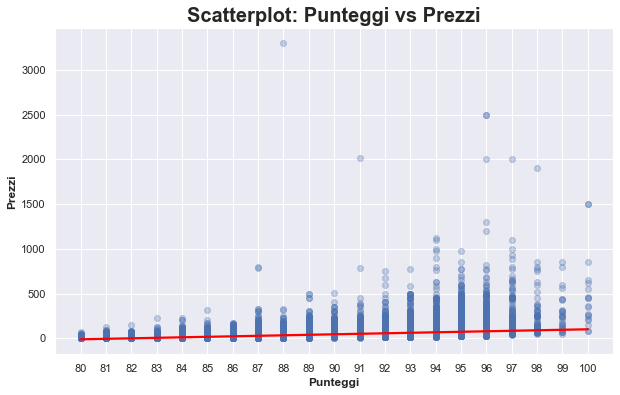

In [234]:
# Creo scatter plot con la retta di regressione
plt.figure(figsize=(10, 6))
sns.regplot(x='points', y='price', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Scatterplot: Punteggi vs Prezzi', fontsize=20, fontweight='bold')
plt.xlabel('Punteggi', fontweight='bold')
plt.ylabel('Prezzi', fontweight='bold')
# Imposta i ticks da 80 a 100
plt.xticks(range(80, 101))  
plt.show()

In [235]:
# calcolo correlazione
correlation = data[['points', 'price']].corr()
correlation

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


Il grafico è uno scatterplot che mostra la relazione tra i punteggi assegnati ai vini e i relativi prezzi. Ogni "punto" nel grafico rappresenta un vino: inoltre, è tracciata una retta di regressione che aiuta a visualizzare la tendenza generale della relazione. Una correlazione di 0.41, come calcolato sotto il grafico, indica una relazione positiva moderata tra i punteggi e i prezzi dei vini. La retta di regressione nel grafico mostra questa relazione in modo visivo. Poiché la correlazione non è estremamente alta, la retta non è molto ripida, ma mostra comunque una tendenza ascendente. Anche in questo grafico è possibile rintracciare gli outlier di prezzo, rendendo così possibile inquadrarne anche i punteggi.

#### Paesi di provenienza del vino

In [236]:
# Calcolo il punteggio medio e il prezzo medio per ciascun paese
country_avg_scores = data.groupby('country')['points'].mean()
country_avg_prices = data.groupby('country')['price'].mean()

# Calcolo il numero di occorrenze (conteggio) per ciascun paese
country_counts = data['country'].value_counts()

# Creo un DataFrame con i punteggi, i prezzi e il numero di occorrenze per paese
country_data = pd.DataFrame({'Prezzo Medio': country_avg_prices,
                             'Punteggio Medio': country_avg_scores,
                             'Numero di vini': country_counts})

# Formattazione delle colonne a 2 cifre decimali
country_data['Prezzo Medio'] = country_data['Prezzo Medio'].round(2)
country_data['Punteggio Medio'] = country_data['Punteggio Medio'].round(2)

# Ordino il DataFrame in base al punteggio medio in modo decrescente
country_data = country_data.sort_values(by='Punteggio Medio', ascending=False)

# Visualizzo il DataFrame ordinato
print(f"Paesi, prezzi medi, punteggi medi, numero di vini\n\n{country_data}")

Paesi, prezzi medi, punteggi medi, numero di vini

                        Prezzo Medio  Punteggio Medio  Numero di vini
England                        51.68            91.58              74
India                          13.33            90.22               9
Austria                        30.76            90.10            3345
Germany                        42.26            89.85            2165
Canada                         35.71            89.37             257
Hungary                        40.65            89.19             146
China                          18.00            89.00               1
France                         41.14            88.85           22093
Luxembourg                     23.33            88.67               6
Australia                      35.44            88.58            2329
Switzerland                    85.29            88.57               7
Morocco                        19.50            88.57              28
Italy                          39.66   

Questi dati ci forniscono un quadro generale della qualità e dei prezzi dei vini provenienti da tutte le diverse nazioni presenti in queste recensioni di vino. Tuttavia, è importante notare che questi sono dati aggregati e che all'interno di ciascun paese ci potrebbero essere variazioni significative nei punteggi e nei prezzi dei vini a seconda della varietà, della vigna e altro. Notiamo che l'Egitto ad esempio, non ha un prezzo medio. Questo perchè l'Egitto ha solamente un vino nel dataset, e non c'è il prezzo. Ho deciso di non eliminare le righe senza il prezzo proprio per questo motivo: non perdere informazioni correlate potenzialmente importanti, come ad esempio il punteggio, indicatore di qualità, anche in assenza del prezzo. Il numero di occorrenze aiuta a comprendere quanto sia rappresentata ogni nazione all'interno del dataset, oltre che a dare un'idea più precisa di quanto siano indicative le statistiche del punteggio medio e prezzo medio.I 10 Paesi che hanno i punteggi medi più alti sono in ordine: England, India, Austria, Germany, Canada, Hungary, China, France, Luxembourg, Australia.

#### Varietà più apprezzate

In [237]:
# Calcolo il numero di occorrenze, punteggio medio e prezzo medio per ciascuna varietà
variety_stats = data.groupby('variety').agg({
    'variety': 'count',
    'points': 'mean',
    'price': 'mean'
})

# Rinomino le colonne per maggiore chiarezza
variety_stats = variety_stats.rename(columns={'variety': 'Numero di vini', 'points': 'Punteggio Medio', 'price': 'Prezzo Medio'})

# Formattazione a 2 cifre decimali
variety_stats['Punteggio Medio'] = variety_stats['Punteggio Medio'].round(2)

# Ordino in base al punteggio medio in modo decrescente
variety_stats = variety_stats.sort_values(by='Punteggio Medio', ascending=False)

# Stampo le prime 10 varietà
print("Prime 10 varietà per punteggio medio:\n")
print(variety_stats.head(10))

Prime 10 varietà per punteggio medio:

                     Numero di vini  Punteggio Medio  Prezzo Medio
variety                                                           
Terrantez                         1            95.00         236.0
Tinta del Pais                    2            95.00          47.5
Gelber Traminer                   1            95.00          35.0
Bual                              7            94.14         100.0
Sercial                           1            94.00          50.0
Riesling-Chardonnay               1            94.00          40.0
Ramisco                           1            93.00         495.0
Garnacha-Cariñena                 1            93.00          57.0
Blauburgunder                     1            93.00          19.0
Muscadelle                       10            92.50         111.2


Questi sono le 10 varietà più apprezzate di vino, secondo la media dei punteggi, insieme al loro prezzo medio. Giganteggiano in questa classifica il Terrantez, Tinta del Pais e Gelber Traminer; tutte queste varietà si trovano al primo posto con una media del punteggio pari a 95. Con punteggio 94 troviamo Bual, Sercial, Riesling-Chardonnay. Ramisco, Guarnacha-Carinena e Blauburgunder hanno invece una media di 93(ma tutti e 3 hanno solamente un vino nel dataset). Ultimo posto in questo ranking, con una media di 92.5 troviamo il Muscadelle. Ho voluto aggiungere una colonna al recap con il numero di vini, che rappresenta il numero di volte che quella varietà compare nel dataframe, in modo da capire quanto la media dei punteggi sia effettivamente indicativa della qualità della varietà. Ci sono vini di altre varietà che hanno preso sicuramente un voto più alto con qualche loro bottiglia; ma complessivamente quella varietà di vino, magari avendo molti vini nel dataset di quella varietà, finisce per avere un punteggio medio più basso. Certamente varietà come Bual e Muscadelle hanno una qualità eccellente generale se su 7, o 10 bottiglie differenti, sono riuscite ad accumulare un punteggio medio così alto. Un'altro modo di capire quali sono le varietà migliori potrebbere essere quello di cercare i vini che hanno ottenuto il punteggio massimo. 

In [238]:
# Filtro i vini con punteggio 100
wines_with_100_points = data.loc[data['points'] == 100]

# Stampo tutte le righe corrispondenti
wines_with_100_points

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Krug 2002 Brut (Champagne),Champagne Blend,Krug
39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,NaN,NaN,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha
45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,NaN,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
45798,US,Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Napa Valley,Napa,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale
58352,France,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,NaN,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
89728,France,This latest incarnation of the famous brand is...,Cristal Vintage Brut,100,250.0,Champagne,Champagne,NaN,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,NaN,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon


In [239]:
# grafico a barre interattivo
fig = px.bar(wines_with_100_points, x='variety', y='points', color='country',
             labels={'variety': 'Varietà di Vino', 'points': 'Punteggio'},
             title='Vini con punteggio massimo',
             hover_data={'variety': False, 'points': False, 'country': False, 'winery': True, 'price': True, 'province': True},
             hover_name='winery', 
             custom_data=['title', 'price', 'province'])

# template per il testo al passaggio del mouse
fig.update_traces(hovertemplate='%{customdata[0]}<br>Vigna: %{hovertext}<br>Prezzo: %{customdata[1]}<br>Località: %{customdata[2]}')

fig.update_layout(xaxis_title='Varietà di Vino', yaxis_title='Punteggio')
fig.show()

Questo grafico rappresenta le varietà di vino che hanno ottenuto almeno con una bottiglia nel dataset, il punteggio massimo di 100. Il colore della barra indica il paese di provenienza del vino come spiega la legenda sulla destra. Il grafico è "interattivo" e al passaggio del mouse su ogni elemento, vengono mostrate informazioni aggiuntive dettagliate quali il titolo del vino, la vigna, il luogo e il prezzo. (In questo modo riusciamo anche ad identificare quali sono le vigne più rinomate, ovvero quelle che con almeno un vino sono riuscite ad aggiudicarsi il punteggio massimo).

Sono solamente 19 i vini che sono stati premiati con un punteggio di 100, e sono 5 i paesi che sono riusciti ad eccellere in questo campo: La Francia ha 4 varietà con il punteggio massimo: Bourdeaux-style Red Blend, Chardonnay, Champagne Blend, Bordeaux-style White Blend; esattamente quante l'Italia con il Merlot, Sangiovese Grosso, Sangiovese, Prugnolo Gentile. Gli US hanno 3 varietà eccellenti, il Portogallo 2: rispettivamente Syrah, Bordeaux-style Red Blend, Cabernet Sauvignon e Portuguese Red, Port. Chiude questa classifica dell'eccellenza l'Australia con il Muscat.

Concludo segnalando quindi il Bordeaux-style Red Blend come la varietà numero uno in assoluto: compare ben 5 volte (e in due nazioni) tra i vini eccellenti che hanno ottenuto il punteggio massimo(4 francesi, e un americano). Sono solamente altre 2 le varietà che compaiono più di una volta e sono Champagne Blend e Syrah entrambi con 2 vini.

#### Vigne più apprezzate

In [240]:
# Calcolo il punteggio medio, prezzo medio, numero di occorrenze, country, province per ciascuna winery
winery_data = data.groupby(['winery', 'country', 'province']).agg({
    'points': 'mean',
    'price': 'mean',
    'winery': 'count'
}).rename(columns={
    'points': 'Punteggio Medio',
    'price': 'Prezzo Medio',
    'winery': 'Numero di vini'
}).sort_values(by='Punteggio Medio', ascending=False)

# formatto a 2 cifre decimali
winery_data['Punteggio Medio'] = winery_data['Punteggio Medio'].round(2)
winery_data['Prezzo Medio'] = winery_data['Prezzo Medio'].round(2)

# Visualizzo i primi 10 risultati
top_wineries = winery_data.head(10)
print("Top vigne per punteggio medio:")
top_wineries

Top vigne per punteggio medio:


,,,Punteggio Medio,Prezzo Medio,Numero di vini
winery,country,province,,,
Araujo,US,California,98.00,275.00,1
Gandona,US,California,97.00,190.00,1
Ovid,US,California,97.00,195.00,1
Standish,Australia,South Australia,97.00,121.67,3
J.L. Chave,France,Rhône Valley,97.00,125.00,1
Salon,France,Champagne,96.80,380.60,5
Tenuta dell'Ornellaia,Italy,Tuscany,96.70,286.50,10
Château Pétrus,France,Bordeaux,96.67,2250.00,3
Patrimony,US,California,96.00,275.00,1


Questo output rappresenta le migliori vigne per media di punteggio. Quelle migliori in assoluto(con punteggio 100 con almeno una bottiglia) le abbiamo viste prima, nel grafico interattivo dei vini con punteggio 100. Come il recap precedente ho inserito anche il prezzo medio e il numero di occorrenze. In più troviamo anche la nazione in cui si trova la vigna, e la provincia. Notiamo che gli US hanno 5 vigne diverse in questa classifica, tutte situate in California. La Francia è rappresentata da 3 vigne, in 3 province diverse: Bordeaux, Champagne, Rhone Valley. Italia ha una vigna eccellente in questa classifica (tra l'altro quella con più vini giudicati tra queste altre nel ranking): Tenuta dell'Ornellaia in Toscana, con un punteggio medio superiore al 96(quasi 97) e un prezzo medio abbastanza alto (286.5). Anche l'Australia compare 3 volte in questa classifica con la sua vigna Standish in South Australia.

## Parte2. Assortimento marketplace

Dopo aver esplorato a fondo il vasto universo vinicolo, mettendo in luce le varietà più apprezzate e le vigne di eccellenza, mi concentro ora a sviluppare una strategia di assortimento mirata per il nostro marketplace. L'obiettivo è selezionare con cura i vini italiani, offrendo ai nostri clienti un'esperienza di degustazione unica. Attraverso un'analisi accurata delineeremo una selezione diversificata e bilanciata, rispettando la qualità e valorizzando la varietà, per garantire un assortimento che soddisfi i gusti più raffinati e gli appassionati più esigenti. 
Possiamo dividere l'assortimento in base a criteri come la qualità del vino e il rapporto qualità prezzo. Ecco una possibile suddivisione: 
- **Categoria1** = 40% - vini di medio-alta qualità con prezzi medio-bassi
- **Categoria2** = 30% - vini di altissima qualità con prezzi medio-alti
- **Categoria3** = 20% - vini di qualità eccellente dalle migliori vigne
- **Categoria4** = 10% - vini di qualità eccellente dal mondo

Questo approccio permetterà di offrire una gamma diversificata di vini che soddisfino diversi tipi di clienti, dalle persone che cercano vini di altissima qualità senza considerazioni di prezzo, a coloro che vogliono un buon rapporto qualità-prezzo. Ovviamente, possiamo personalizzare queste percentuali in base alle preferenze specifiche e alle esigenze del mercato, o definire altri criteri per la selezione dell'assortimento. Il target di selezione iniziale sarà pari a 100 vini.

#### Analisi vini italiani

In [241]:
# Filtro il DataFrame per includere solo i vini italiani
italian_wines = data[data['country'] == 'Italy']

# escludo quelli senza prezzo (fondamentale per scegliere i vini)
italian_wines = italian_wines.dropna(subset=['price'])

In [242]:
# stats italian_wines
italian_wines.describe()

,points,price
count,16914.000000,16914.000000
mean,88.618186,39.663770
std,2.660785,38.052479
min,80.000000,5.000000
25%,87.000000,18.000000
50%,88.000000,28.000000
75%,90.000000,50.000000
max,100.000000,900.000000


I vini italiani (con prezzo, fondamentale per il fine ultimo dell'analisi) sono 16914. Il punteggio medio è 88.6, il prezzo medio 39.6; il vino italiano più costoso costa 900 euro, e il più economico appena 5.

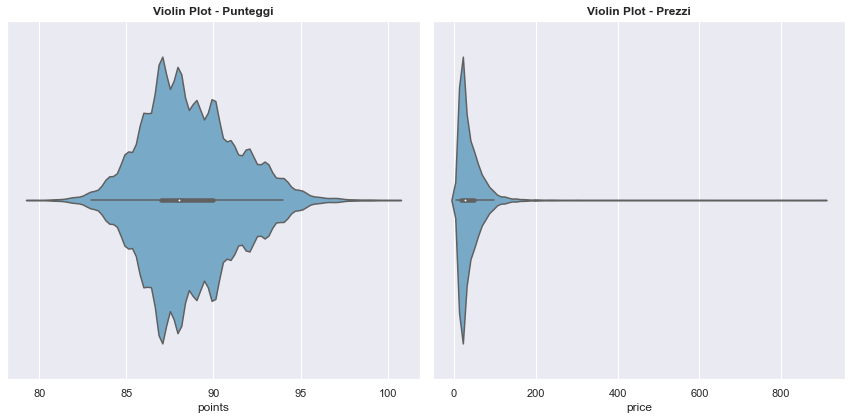

In [243]:
# Creazione del violin plot per i punteggi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='points', data=italian_wines, palette='Blues')
plt.title('Violin Plot - Punteggi', fontweight='bold')

# Creazione del violin plot per i prezzi
plt.subplot(1, 2, 2)
sns.violinplot(x='price', data=italian_wines, palette='Blues')
plt.title('Violin Plot - Prezzi', fontweight='bold')

plt.tight_layout()
plt.show()

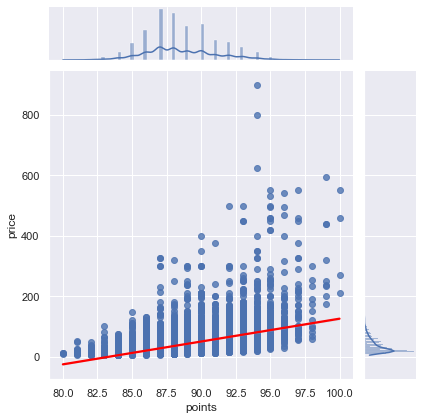

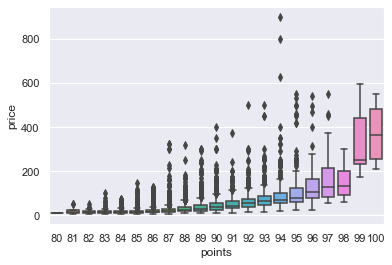

In [244]:
# Joint plot
jp = sns.jointplot(x='points', y='price', data=italian_wines, kind='reg')
jp.ax_joint.get_lines()[0].set_color('red')
plt.show()

# Box plot
sns.boxplot(x='points', y='price', data=italian_wines)
plt.show()


In [245]:
# Creo un subset del DataFrame
italian_wines_subset = italian_wines[['points', 'price']]

# Calcola la correlazione tra prezzo e punteggio
correlation = italian_wines_subset.corr()

print("Correlazione tra prezzo e punteggio per i vini italiani:\n")
correlation

Correlazione tra prezzo e punteggio per i vini italiani:



,points,price
points,1.000000,0.528073
price,0.528073,1.000000


Questo valore (0.52, più alto in italia che nella distribuzione generale) indica una correlazione moderata positiva tra il punteggio del vino e il suo prezzo: all'aumentare del punteggio, generalmente aumenta anche il prezzo e viceversa. Tuttavia, la correlazione non è estremamente forte. Sopra ho fatto un jointplot, un tipo di grafico bivariato che combina un grafico a dispersione rappresentante la distribuzione tra 2 variabili e i rispettivi istogrammi per ogni variabile. Il grafico mostra la relazione tra il punteggio del vino e il prezzo. Gli istogrammi laterali mostrano la distribuzione delle due variabili rispettivamente lungo l'asse x (punteggi) e lungo l'asse y (prezzi). Ho aggiunto anche qua la linea di regressione che rappresenta la tendenza generale tra le due variabili.Il boxplot invece analizza la distribuzione dei prezzi per ogni punteggio, mostrando chiaramente anche gli outlier di prezzo per ogni categoria di punteggio.

#### Luoghi di provenienza dei vini italiani

In [246]:
# Raggruppo per provincia e calcolo le statistiche
province_stats = italian_wines.groupby('province').agg({
    'points': 'mean',
    'price': 'mean',
    'province': 'count'
})

# Rinomino le colonne
province_stats = province_stats.rename(columns={'province': 'Numero di Occorrenze', 'points': 'Punteggio Medio', 'price': 'Prezzo Medio'})

# Ordino in base al punteggio medio in modo decrescente
province_stats = province_stats.sort_values(by='Punteggio Medio', ascending=False)

# Calcolo il totale delle occorrenze per tutte le province italiane
total_occorrenze_italia = province_stats['Numero di Occorrenze'].sum()

# Calcolo la percentuale rappresentativa per ogni provincia
province_stats['Percentuale'] = (province_stats['Numero di Occorrenze'] / total_occorrenze_italia) * 100

# Arrotondo le colonne a 2 decimali
province_stats['Punteggio Medio'] = province_stats['Punteggio Medio'].round(2)
province_stats['Prezzo Medio'] = province_stats['Prezzo Medio'].round(2)
province_stats['Percentuale'] = province_stats['Percentuale'].round(2)

print("Vini italiani e provenienze:\n")
province_stats

Vini italiani e provenienze:



,Punteggio Medio,Prezzo Medio,Numero di Occorrenze,Percentuale
province,,,,
Piedmont,89.58,54.96,3089,18.26
Tuscany,89.15,47.68,5128,30.32
Lombardy,88.87,36.95,481,2.84
Sicily & Sardinia,88.19,27.62,1559,9.22
Northeastern Italy,88.04,27.05,1986,11.74
Italy Other,87.96,32.07,112,0.66
Southern Italy,87.86,27.80,1131,6.69
Veneto,87.86,34.01,2315,13.69
Central Italy,87.43,25.44,1100,6.50


Questo output mostra i luoghi di provenienza dei vini italiani nel nostro dataset. Ci sono solamente 10 "località" di provenienza: per ogni luogo ho contato il numero di vini, punteggio medio e prezzo medio. Come plus ho calcolato anche la percentuale rappresentativa della regione rispetto al totale dei vini italiani, che utilizzerò nel grafico successivo. Scopriamo quindi che i punteggi medi più alti spettano a Piemonte e Toscana (89) così come i prezzi più alti. Sono anche le regioni con più occorrenze nei dati: conseguenza dell'aver calcolato la percentuale rappresentativa di ogni luogo, scopriamo che Piemonte e Toscana insieme contano più del 48% di tutti i vini italiani del dataset analizzato(con il prezzo).

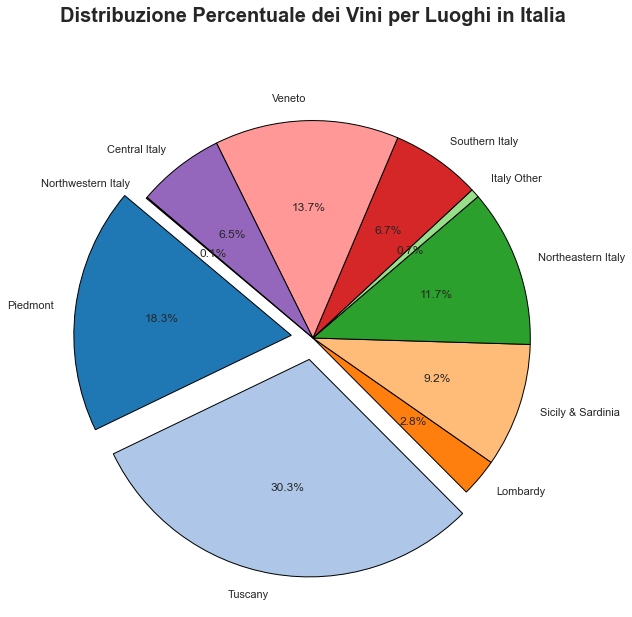

In [247]:
# Estraggo le etichette delle province e le percentuali
labels = province_stats.index
percentages = province_stats['Percentuale']

# Colori per ogni fetta
colors = plt.cm.tab20.colors

# Lista di esplosioni per evidenziare le fette desiderate
explode = [0.1 if label in ['Tuscany', 'Piedmont'] else 0 for label in labels]

# Creo il grafico a torta
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(percentages, labels=labels, autopct='%1.1f%%', colors=colors,
                                  startangle=140, explode=explode, wedgeprops={'edgecolor': 'black'})

# Aggiungo un titolo
plt.title('Distribuzione Percentuale dei Vini per Luoghi in Italia', fontweight='bold', fontsize=20, y=1.07)

# Mostro il grafico
plt.show()

Obiettivo dichiarato del marketplace è quello di mettere in contatto piccoli produttori locali con acquirenti da tutto il mondo. Avere una chiara idea di tutti i luoghi di provenienza del vino italiano mi aiuterà ad includere tutte le "regioni" presenti nei dati.

#### Varietà vini italiani

In [248]:
# Raggruppo per varietà e calcola le statistiche
variety_stats = italian_wines.groupby('variety').agg({
    'points': 'mean',
    'price': 'mean',
    'variety': 'count'
})

# Rinomino le colonne
variety_stats = variety_stats.rename(columns={'variety': 'Numero di vini', 'points': 'Punteggio Medio', 'price': 'Prezzo Medio'})

# Formattazione a 2 cifre decimali
variety_stats['Punteggio Medio'] = variety_stats['Punteggio Medio'].round(2)
variety_stats['Prezzo Medio'] = variety_stats['Prezzo Medio'].round(2)

# Ordino in base al punteggio medio in modo decrescente
variety_stats = variety_stats.sort_values(by='Punteggio Medio', ascending=False)

print("Top20 varietà italiane per punteggio medio:\n")
variety_stats.head(20)

Top20 varietà italiane per punteggio medio:



,Punteggio Medio,Prezzo Medio,Numero di vini
variety,,,
Roviello,93.00,28.00,1
Sirica,92.50,23.00,2
Pignolo,92.00,70.00,1
Cabernet Sauvignon-Merlot,92.00,61.50,2
Caprettone,92.00,19.00,1
Centesimino,92.00,36.00,1
Moscato di Noto,92.00,40.00,1
Vespaiolo,92.00,40.00,1
Picolit,91.50,70.09,22


Questo output rappresenta le top20 varietà di vino italiane, secondo la valutazione media, con il numero di occorrenze. Anche in questo caso, potrebbe non essere completamente rappresentativa della realtà questa classifica, in quanto ci possono essere nel dataset molte varietà di vino che magari hanno ottenuto almeno una volta (anche qua alcune varietà compaiono solo una volta -perlomeno con il prezzo) un punteggio più alto per alcuni vini, ma tuttavia la media totale del punteggio, essendo influenzata da un numero maggiore e potenzialmente molto alto di vini nel dataset, rimane più bassa. Per questo motivo ho inserito nel recap anche il numero delle occorrenze; in questo modo riusciamo ad avere un'idea di quanto la media del punteggio, o del prezzo, sia indicativa della realtà.

In [249]:
# Ordino in base al punteggio in modo decrescente
italian_wines_sorted_by_points = italian_wines.sort_values(by='points', ascending=False)

# Visualizzo i primi 20 risultati
print("Primi 20 vini italiani ordinati per punteggio:")
italian_wines_sorted_by_points.head(20)

Primi 20 vini italiani ordinati per punteggio:


,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,NaN,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
111754,Italy,It takes only a few moments before you appreci...,Cerretalto,100,270.0,Tuscany,Brunello di Montalcino,NaN,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Casanova di Neri
45573,Italy,"Elegant and complex, this gorgeous wine is all...",Monprivato,99,175.0,Piedmont,Barolo,NaN,Mascarello Giuseppe e Figlio 2010 Monprivato ...,Nebbiolo,Mascarello Giuseppe e Figlio
35517,Italy,"One of Italy's most iconic bottlings, the 2012...",Sassicaia,99,235.0,Tuscany,Bolgheri Sassicaia,NaN,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend,Tenuta San Guido
122936,Italy,"Perfumed berry, rose, new leather and dark spi...",Madonna delle Grazie,99,200.0,Tuscany,Brunello di Montalcino,NaN,Il Marroneto 2012 Madonna delle Grazie (Brune...,Sangiovese,Il Marroneto
60881,Italy,Always a standout among Gaja's five single-vin...,Sorì San Lorenzo,99,440.0,Piedmont,Langhe,NaN,Gaja 2007 Sorì San Lorenzo Nebbiolo (Langhe),Nebbiolo,Gaja
60880,Italy,This is an elegant Nebbiolo-based wine and arg...,Sorì Tildìn,99,440.0,Piedmont,Langhe,NaN,Gaja 2007 Sorì Tildìn Nebbiolo (Langhe),Nebbiolo,Gaja
39287,Italy,Here's a “wow” wine you won't easily forget. M...,Messorio,99,320.0,Tuscany,Toscana,NaN,Le Macchiole 2007 Messorio Merlot (Toscana),Merlot,Le Macchiole


Questi sono invece i primi 20 vini italiani, ordinando il dataset per punteggio maggiore, insieme con tutte le altre informazioni correlate. Notiamo che le regioni presenti sono solamente 2: Piemonte e Toscana, che sicuramente rappresentano l'eccellenza enologica italiana. 

In [250]:
# Conto le occorrenze di ciascuna vigna nei primi 20 dati
winery_counts_top_20 = italian_wines_sorted_by_points.head(20)['winery'].value_counts()

# Visualizzo le occorrenze 
print("Occorrenze di ciascuna vigna nei primi 20 vini italiani per punteggio:\n")
print(winery_counts_top_20)

Occorrenze di ciascuna vigna nei primi 20 vini italiani per punteggio:

Avignonesi                      2
Tenuta dell'Ornellaia           2
Mascarello Giuseppe e Figlio    2
Tenuta San Guido                2
Gaja                            2
Biondi Santi                    1
Casanova di Neri                1
Il Marroneto                    1
Le Macchiole                    1
Marchesi Antinori               1
Giuseppe Rinaldi                1
Massolino                       1
Comm. G. B. Burlotto            1
Brezza                          1
Conti Costanti                  1
Name: winery, dtype: int64


Vediamo così che ci sono 5 vigne che compaiono ben 2 volte ciascuna nei primi 20 vini eccellenti italiani. Sicuramente anche questi dati possono essere indicativi delle qualità generale della vigna, che comparendo più volte in questa classifica sicuramente dimostra di saper produrre vini esclusivi ed eccellenti.

#### Assortimento

In [251]:
# CATEGORIA 1 

# Definizione delle subcategories
categories = {
    'Categoria1': {'score_range': [87, 88], 'price_range': (5, 20), 'count': 10},
    'Categoria2': {'score_range': [88, 89], 'price_range': (20, 30), 'count': 15},
    'Categoria3': {'score_range': [90, 91], 'price_range': (30, 40), 'count': 15}
}

# Inizializzazione del DataFrame per la categoria1
categoria1_df = pd.DataFrame()

# Selezione dei vini per ogni categoria
for category, params in categories.items():
    selected_wines = italian_wines[
        (italian_wines['points'].isin(params['score_range'])) &
        (italian_wines['price'] >= params['price_range'][0]) &
        (italian_wines['price'] <= params['price_range'][1])
    ].sample(n=params['count'])
    
    # Aggiunta dei vini selezionati alla categoria1
    categoria1_df = pd.concat([categoria1_df, selected_wines])

# Visualizza i vini selezionati per la categoria1
print(f"Vini selezionati per la prima categoria: {len(categoria1_df)}")


Vini selezionati per la prima categoria: 40


In [252]:
# CATEGORIA 2

# Definizione delle subcategories
categories2 = {
    'Categoria2': {'score_range': [94, 93, 92], 'price_range': (30, 50), 'count_per_province': 1},
    'Categoria2_Extra': {'score_range': [97, 96, 95], 'price_range': (50, 100 ), 'count_extra': 20}
}

# Inizializzazione del DataFrame per la categoria2
categoria2_df = pd.DataFrame()

# Selezione dei vini per ogni categoria
for category, params in categories2.items():
    selected_wines = pd.DataFrame()
    for province in province_stats.index:
        province_wines = italian_wines[
            (italian_wines['points'].isin(params['score_range'])) &
            (italian_wines['price'] >= params['price_range'][0]) &
            (italian_wines['price'] <= params['price_range'][1]) &
            (italian_wines['province'] == province)
        ]
        
        if len(province_wines) > 0:
            selected_wine = province_wines.sample(n=1)
            selected_wines = pd.concat([selected_wines, selected_wine])
    
    # Aggiunta dei vini selezionati alla categoria2
    categoria2_df = pd.concat([categoria2_df, selected_wines])
    
    # Seleziono altri vini senza tener conto della provincia
    remaining_count = params.get('count_extra', 0)
    remaining_wines = italian_wines[
        (italian_wines['points'].isin(params['score_range'])) &
        (italian_wines['price'] >= params['price_range'][0]) &
        (italian_wines['price'] <= params['price_range'][1])
    ].sample(n=remaining_count, replace=True)
    
    # Aggiunta dei vini selezionati alla categoria2
    categoria2_df = pd.concat([categoria2_df, remaining_wines])

# Assicuro che siano esattamente 30 vini
categoria2_df = categoria2_df.sample(n=30, replace=True)

# Visualizza i vini selezionati per la categoria2
print(f"Vini selezionati per la seconda categoria: {len(categoria2_df)}")


Vini selezionati per la seconda categoria: 30


In [253]:
# CATEGORIA 3

# Lista delle vigne delle quali selezionare i vini
selected_wineries = winery_counts_top_20.index.tolist()

# Seleziono i vini di eccellente qualità per le vigne selezionate
categoria3_df = italian_wines[
    (italian_wines['points'].isin([100, 99, 98])) &
    (italian_wines['winery'].isin(selected_wineries))
].sample(n=20, replace=True)

# Visualizza i vini selezionati per la categoria3
print(f"Vini selezionati per la terza categoria: {len(categoria3_df)}")

Vini selezionati per la terza categoria: 20


In [254]:
# CATEGORIA 4

# Ordino il dataset iniziale in modo decrescente per punteggio
world_wines_sorted = data.sort_values(by='points', ascending=False)

# Escludi i vini italiani
categoria4_df = world_wines_sorted[world_wines_sorted['country'] != 'Italy']

# Seleziono i primi 10 vini per punteggio
categoria4_df = categoria4_df.head(10)

# Visualizza i vini selezionati per la categoria4
print(f"Vini selezionati per la quarta categoria: {len(categoria4_df)}")


Vini selezionati per la quarta categoria: 10


In [255]:
# Concateno i DataFrame delle quattro categorie
assortimento_iniziale = pd.concat([categoria1_df, categoria2_df, categoria3_df, categoria4_df], ignore_index=True)

# Conto il numero totale di vini nell'assortimento iniziale
numero_totale_vini = len(assortimento_iniziale)

# Visualizza il numero totale di vini
print(f"Numero totale di vini nell'assortimento iniziale: {numero_totale_vini}")

Numero totale di vini nell'assortimento iniziale: 100


In [256]:
assortimento_iniziale.describe()

,points,price
count,100.000000,100.000000
mean,93.720000,138.370000
std,4.476831,242.553073
min,87.000000,13.000000
25%,89.750000,30.000000
50%,95.000000,59.500000
75%,98.000000,97.000000
max,100.000000,1500.000000


Il nostro dataframe contenente l'assortimento iniziale è pronto per essere ulteriormente analizzato e perfezionato in una fase successiva, che esula però dagli obiettivi di questo progetto. La suddivisione della selezione in diverse categorie con obiettivi e target facilmente modificabili, ne faciliterà la messa a punto in un secondo momento. 

<Figure size 720x432 with 0 Axes>

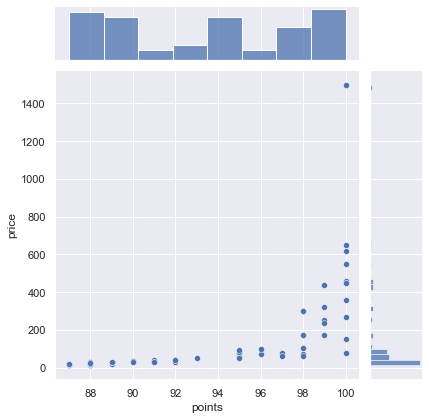

In [257]:
# jointplot assortimento_iniziale
plt.figure(figsize=(10, 6))
sns.jointplot(x='points', y='price', data=assortimento_iniziale, kind='scatter')
plt.show()

#### Conclusioni

Dalla nostra analisi, è emerso chiaramente che il mondo del vino offre una diversità straordinaria, con una vasta gamma di varietà di uve e vigne provenienti da differenti aree geografiche. Abbiamo individuato correlazioni interessanti tra variabili come il punteggio assegnato al vino, il prezzo, la varietà e la provenienza. 
L'output del mio lavoro è una strategia di assortimento per un ipotetico marketplace del vino. Questa strategia è basata su una selezione attenta e diversificata di 100 vini: rappresenta l'essenza dell'eccellenza vinicola, includendo varietà di uve raffinate provenienti da rinomate vigne, accuratamente selezionate per soddisfare le diverse preferenze dei nostri clienti. Una particolare attenzione è stata rivolta all'inclusione di vini provenienti da tutte le località italiane, rappresentando così le varie sfumature regionali e tradizioni enologiche dell'Italia. Questa scelta strategica ci permette di presentare ai nostri clienti un vero e proprio viaggio attraverso le rinomate cantine italiane.